In [4]:
from sklearn.metrics import precision_recall_curve, f1_score, auc, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Receiver Operating Characteristic (ROC) curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
Therefore, we don't use ROC curve in this case, assuming that the anomalies are rare.

In [5]:
df = pd.read_csv('data/bottle_results.csv')
y_score, y_test = df['Scores'], df['Label']

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

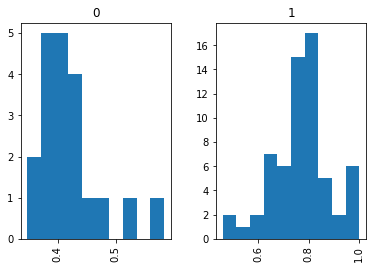

In [6]:
df['Scores'].hist(by=df['Label'])

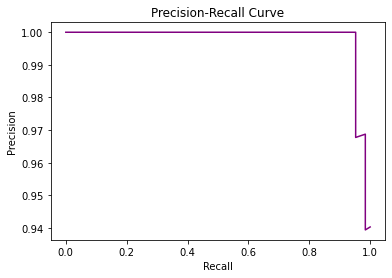

In [7]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [115]:
def get_wrong_count(y_true, y_pred):
    return sum(np.where(y_true == y_pred , 0, 1))


def get_threshold(df, start=0, end=10000, step=1):
    least_wrong_count = float('inf')
    best_threshold = 0
    y_true = df['Label']
    for num in range(max(start, 0), min(end, 10000) + 1, step):
        threshold = num / 10000
        y_pred = np.where(df.Scores >= threshold, 1, 0)
        wrong_count = get_wrong_count(y_true, y_pred)
        if wrong_count < least_wrong_count:
            least_wrong_count = wrong_count
            best_threshold = threshold
    return best_threshold, least_wrong_count
        

Unnamed: 0


Text(0, 0.5, 'Sample Count')

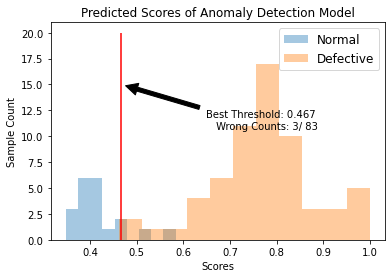

In [116]:
# Running the function
# best_threshold, wrong_count = get_threshold(df)
best_threshold, wrong_count = get_threshold(df)

# Plotting
normal = df[df.Label == 0]
defective = df[df.Label == 1]

sns.distplot(normal['Scores'],  kde=False, label='Normal')
sns.distplot(defective['Scores'],  kde=False,label='Defective')
print(max(max(normal), max(defective)))
# Draw the threshold line
ymax = 20
plt.vlines(x=best_threshold, ymin=0, ymax=ymax, colors='r')
plt.annotate(f'Best Threshold: {best_threshold} \n Wrong Counts: {wrong_count}/ {len(df)}',  
            xy=(best_threshold, ymax - 5),  xycoords='data',
            xytext=(0.8, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Predicted Scores of Anomaly Detection Model')
plt.xlabel('Scores')
plt.ylabel('Sample Count')


Unnamed: 0


Text(0, 0.5, 'Sample Count')

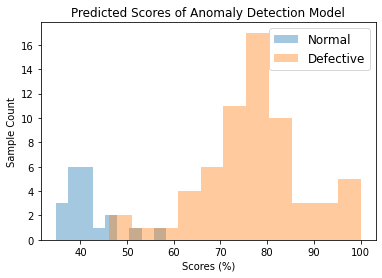

In [114]:
# Running the function
# best_threshold, wrong_count = get_threshold(df)
best_threshold, wrong_count = get_threshold(df, 4600, 6000)

# Plotting
normal = df[df.Label == 0]
defective = df[df.Label == 1]

sns.distplot(normal['Scores'] * 100,  kde=False, label='Normal')
sns.distplot(defective['Scores'] * 100,  kde=False,label='Defective')
print(max(max(normal), max(defective)))

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Predicted Scores of Anomaly Detection Model')
plt.xlabel('Scores (%)')
plt.ylabel('Sample Count')